In [1]:
# Imports
import fastf1
import matplotlib as mpl
import matplotlib.pyplot as plt
from fastf1 import plotting
from timple.timedelta import strftimedelta
from fastf1.core import Laps
import pandas as pd
import seaborn as sns

In [2]:
# GP picker
year = 2022 #GP year
gp = 'Jeddah' # GP name
event = 1 # Q for qualifying, FP1 for free practice 1, R for race

In [3]:
# Configure matplotlib and f1 plots with this intit
mpl.rcParams['figure.dpi'] = 110
mpl.rcParams['figure.figsize'] = (6,6)
fastf1.Cache.enable_cache(r"/Users/Professor/Downloads/f1/cache")
fastf1.plotting.setup_mpl()
fastf1.plotting.setup_mpl(mpl_timedelta_support = True, color_scheme = 'fastf1', misc_mpl_mods = False)

In [22]:
session = fastf1.get_session(year, gp, event)
session.load()
laps = session.laps
#laps.dropna(subset=['Driver'], inplace = True)

core           INFO 	Loading data for Saudi Arabian Grand Prix - Practice 1 [v2.2.1]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '27', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '4', '3', '63', '77']


In [23]:
driver = 'VER'
all_ver = laps.pick_driver(driver).pick_accurate()
all_ver_tel = all_ver.get_telemetry()
lap_ver = laps[laps['Driver']==driver].pick_fastest()
tel_ver = lap_ver.get_telemetry()
car_ver = lap_ver.get_car_data()
driver = 'LEC'
all_ham = laps.pick_driver(driver).pick_accurate()
all_ham_tel = all_ham.get_telemetry()
lap_ham = laps[laps['Driver']==driver].pick_fastest()
tel_ham = lap_ham.get_telemetry()
car_ham = lap_ham.get_car_data()

Text(0.5, 1.0, 'Saudi Arabian Grand Prix 2022 \nFP1, Gear #')

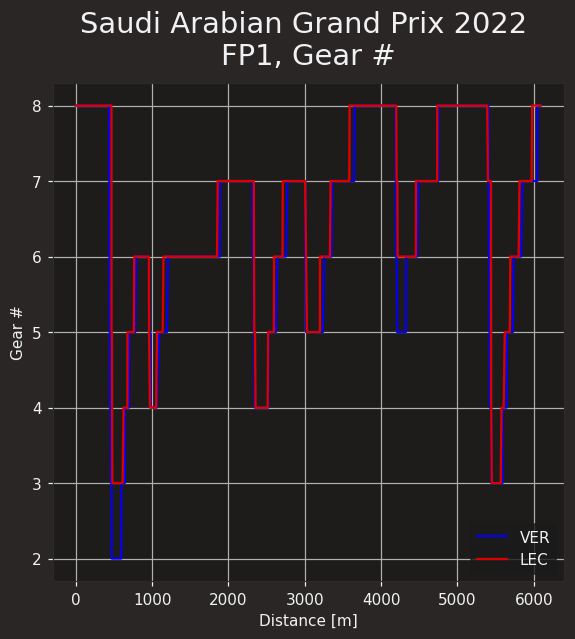

In [32]:
plt.plot(tel_ver['Distance'], tel_ver['nGear'], label='VER', color=fastf1.plotting.team_color('Red Bull'))
plt.plot(tel_ham['Distance'], tel_ham['nGear'], label='LEC', color=fastf1.plotting.team_color('Ferrari'))
plt.xlabel('Distance [m]')
plt.ylabel('Gear #')
plt.grid()
plt.legend()
plt.title(f"{session.event.EventName} {session.event.year} \nFP1, Gear #")

Text(0.5, 1.0, 'Saudi Arabian Grand Prix 2022 \nQualifying, RPM')

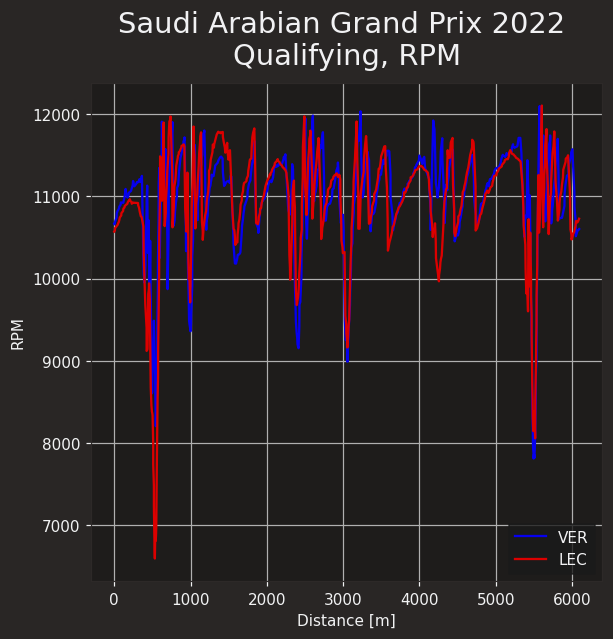

In [34]:
plt.plot(tel_ver['Distance'], tel_ver['RPM'], label='VER', color=fastf1.plotting.team_color('Red Bull'))
plt.plot(tel_ham['Distance'], tel_ham['RPM'], label='LEC', color=fastf1.plotting.team_color('Ferrari'))
plt.xlabel('Distance [m]')
plt.ylabel('RPM')
#plt.ylim(0, 9)
plt.grid()
plt.legend()
plt.title(f"{session.event.EventName} {session.event.year} \nQualifying, RPM")

Text(0.5, 1.0, 'Saudi Arabian Grand Prix 2022 \nQualifying, Throttle')

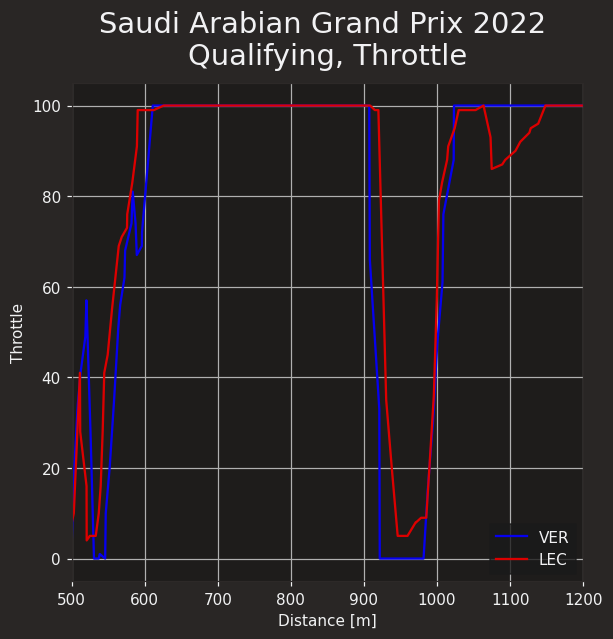

In [35]:
plt.plot(tel_ver['Distance'], tel_ver['Throttle'], label='VER', color=fastf1.plotting.team_color('Red Bull'))
plt.plot(tel_ham['Distance'], tel_ham['Throttle'], label='LEC', color=fastf1.plotting.team_color('Ferrari'))
plt.xlabel('Distance [m]')
plt.ylabel('Throttle')
plt.xlim(500, 1200)
plt.grid()
plt.legend()
plt.title(f"{session.event.EventName} {session.event.year} \nQualifying, Throttle")

/usr/local/lib/python3.9/site-packages/fastf1/events.py:634: FutureWarning: The `Weekend.name` property is deprecated and will beremoved in a future version.
Use `Event['EventName']` or `Event.EventName` instead.
  warnings.warn(


Text(0.5, 1.0, 'Bahrain Grand Prix 2022 \nQualifying, Brake')

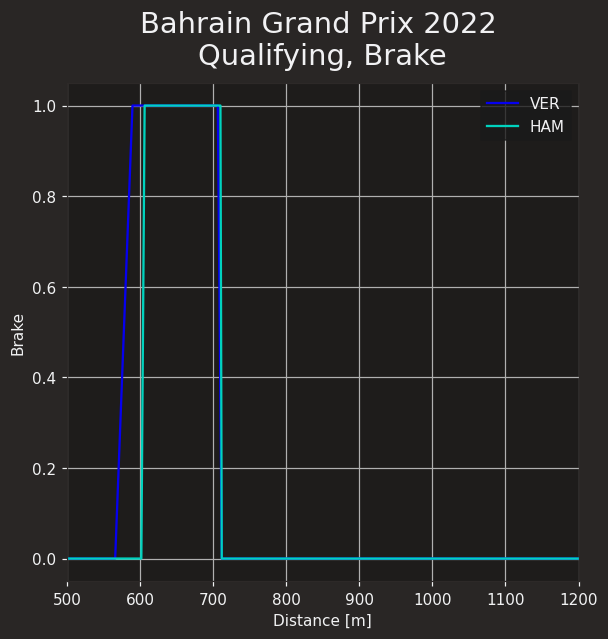

In [37]:
plt.plot(tel_ver['Distance'], tel_ver['Brake'], label='VER', color=fastf1.plotting.team_color('Red Bull'))
plt.plot(tel_ham['Distance'], tel_ham['Brake'], label='HAM', color=fastf1.plotting.team_color('Mercedes'))
plt.xlabel('Distance [m]')
plt.ylabel('Brake')
plt.xlim(500, 1200)
plt.grid()
plt.legend()
plt.title(f"{session.event.name} {session.event.year} \nQualifying, Brake")

/usr/local/lib/python3.9/site-packages/fastf1/events.py:634: FutureWarning: The `Weekend.name` property is deprecated and will beremoved in a future version.
Use `Event['EventName']` or `Event.EventName` instead.
  warnings.warn(


Text(0.5, 1.0, 'Bahrain Grand Prix 2022 \nQualifying, DRS')

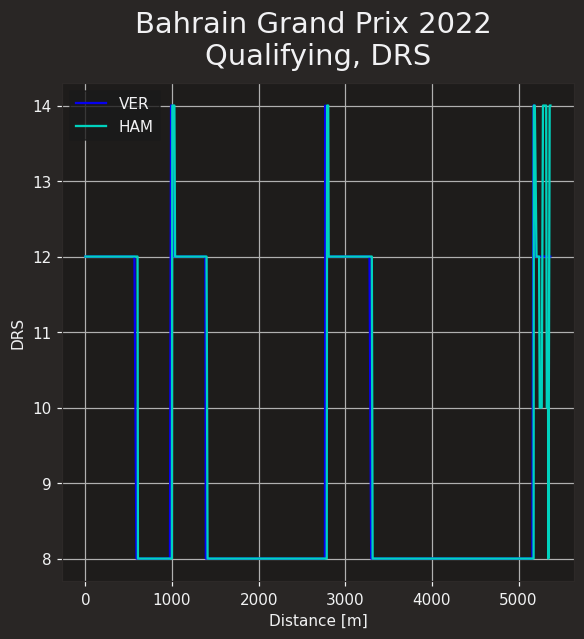

In [38]:
plt.plot(tel_ver['Distance'], tel_ver['DRS'], label='VER', color=fastf1.plotting.team_color('Red Bull'))
plt.plot(tel_ham['Distance'], tel_ham['DRS'], label='HAM', color=fastf1.plotting.team_color('Mercedes'))
plt.xlabel('Distance [m]')
plt.ylabel('DRS')
#plt.xlim(500, 1200)
plt.grid()
plt.legend()
plt.title(f"{session.event.name} {session.event.year} \nQualifying, DRS")

Text(0.5, 1.0, 'Saudi Arabian Grand Prix 2022 \nQualifying, Speed')

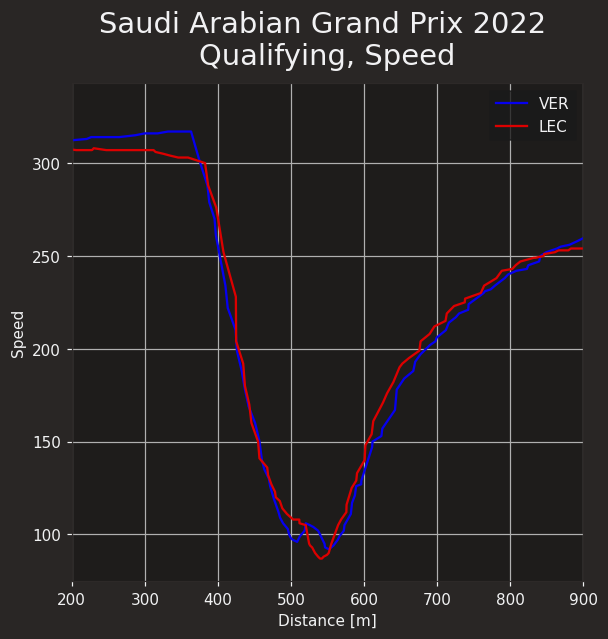

In [43]:
plt.plot(tel_ver['Distance'], tel_ver['Speed'], label='VER', color=fastf1.plotting.team_color('Red Bull'))
plt.plot(tel_ham['Distance'], tel_ham['Speed'], label='LEC', color=fastf1.plotting.team_color('Ferrari'))
plt.xlabel('Distance [m]')
plt.ylabel('Speed')
plt.xlim(200, 900)
plt.grid()
plt.legend()
plt.title(f"{session.event.EventName} {session.event.year} \nQualifying, Speed")

/usr/local/lib/python3.9/site-packages/fastf1/events.py:634: FutureWarning: The `Weekend.name` property is deprecated and will beremoved in a future version.
Use `Event['EventName']` or `Event.EventName` instead.
  warnings.warn(


Text(0.5, 1.0, 'Bahrain Grand Prix 2022 \nQualifying, Speed')

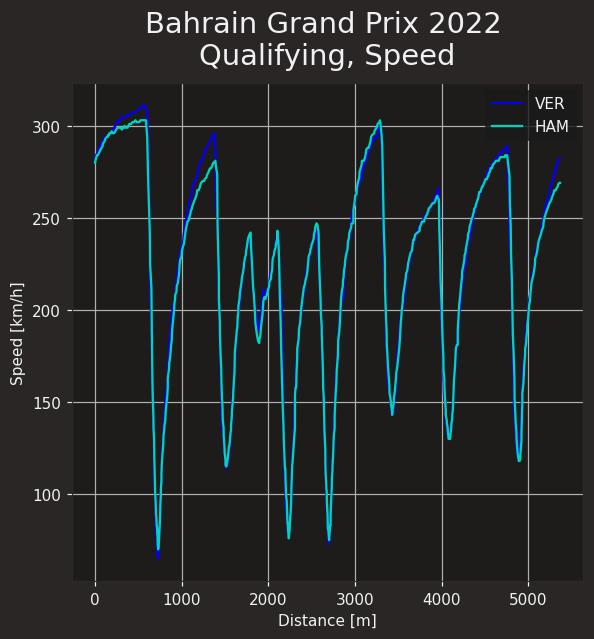

In [72]:
plt.plot(tel_ver['Distance'], tel_ver['Speed'], label='VER', color=fastf1.plotting.team_color('Red Bull'))
plt.plot(tel_ham['Distance'], tel_ham['Speed'], label='HAM', color=fastf1.plotting.team_color('Mercedes'))
plt.xlabel('Distance [m]')
plt.ylabel('Speed [km/h]')
#plt.xlim(4700, 5100)
plt.grid()
plt.legend()
plt.title(f"{session.event.name} {session.event.year} \nQualifying, Speed")

In [16]:
all_ver.get_pos_data()

KeyError: '1'

In [20]:
all_ham.get_telemetry()

KeyError: '16'

In [19]:
all_ham

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedFL,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate
232,0 days 00:44:42.733000,16,0 days 00:01:33.987000,2,1,NaT,NaT,0 days 00:00:34.888000,0 days 00:00:30.001000,0 days 00:00:29.098000,...,288.0,318.0,HARD,2.0,True,0 days 00:43:08.746000,Ferrari,LEC,1,True
233,0 days 00:46:17.453000,16,0 days 00:01:34.720000,3,1,NaT,NaT,0 days 00:00:34.354000,0 days 00:00:31.094000,0 days 00:00:29.272000,...,290.0,310.0,HARD,3.0,True,0 days 00:44:42.733000,Ferrari,LEC,1,True
234,0 days 00:47:49.907000,16,0 days 00:01:32.454000,4,1,NaT,NaT,0 days 00:00:33.797000,0 days 00:00:29.810000,0 days 00:00:28.847000,...,293.0,312.0,HARD,4.0,True,0 days 00:46:17.453000,Ferrari,LEC,1,True
235,0 days 00:50:05.277000,16,0 days 00:02:15.370000,5,1,NaT,NaT,0 days 00:00:48.556000,0 days 00:00:44.431000,0 days 00:00:42.383000,...,292.0,152.0,HARD,5.0,True,0 days 00:47:49.907000,Ferrari,LEC,1,True
236,0 days 00:51:49.152000,16,0 days 00:01:43.875000,6,1,NaT,NaT,0 days 00:00:36.517000,0 days 00:00:36.978000,0 days 00:00:30.380000,...,291.0,300.0,HARD,6.0,True,0 days 00:50:05.277000,Ferrari,LEC,1,True
237,0 days 00:53:20.622000,16,0 days 00:01:31.470000,7,1,NaT,NaT,0 days 00:00:33.390000,0 days 00:00:29.346000,0 days 00:00:28.734000,...,280.0,318.0,HARD,7.0,True,0 days 00:51:49.152000,Ferrari,LEC,2,True
241,0 days 01:09:21.508000,16,0 days 00:01:31.192000,11,3,NaT,NaT,0 days 00:00:33.375000,0 days 00:00:29.297000,0 days 00:00:28.520000,...,295.0,323.0,SOFT,NaN,True,0 days 01:07:50.316000,Ferrari,LEC,1,True
242,0 days 01:11:34.493000,16,0 days 00:02:12.985000,12,3,NaT,NaT,0 days 00:00:47.333000,0 days 00:00:42.113000,0 days 00:00:43.539000,...,294.0,115.0,SOFT,NaN,True,0 days 01:09:21.508000,Ferrari,LEC,1,True
243,0 days 01:13:05.265000,16,0 days 00:01:30.772000,13,3,NaT,NaT,0 days 00:00:33.307000,0 days 00:00:29.035000,0 days 00:00:28.430000,...,298.0,323.0,SOFT,NaN,True,0 days 01:11:34.493000,Ferrari,LEC,1,True
244,0 days 01:14:44.707000,16,0 days 00:01:39.442000,14,3,NaT,NaT,0 days 00:00:34.624000,0 days 00:00:32.295000,0 days 00:00:32.523000,...,292.0,260.0,SOFT,NaN,True,0 days 01:13:05.265000,Ferrari,LEC,1,True
